In [189]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [67]:
"""
        Target is 1 if there is a postive change versus last timestamp, else it is 0
"""
org_saartot_df           = pd.read_excel("../data/Original_Data/saartot-2000-2019.xlsx",sheet_name="Sheet1",header=None)
org_saartot_df.drop([4],axis=1,inplace=True)
org_saartot_df.dropna(subset=[0],inplace=True)
print(len(org_saartot_df))
org_saartot_df = org_saartot_df.rename(index=str,columns={0:"Timestamp",1:"Value",2:"Absolute_change",3:"Percentage_change"})
org_saartot_df['Target'] = org_saartot_df["Absolute_change"].apply(lambda x: 1 if x>0 else 0)
y = org_saartot_df.Target


org_saartot_df['Timestamp'] = pd.to_datetime(org_saartot_df['Timestamp'])
org_saartot_df['Year'] = org_saartot_df['Timestamp'].dt.year
org_saartot_df['Month'] = org_saartot_df['Timestamp'].dt.month




230


In [68]:
cars_df = pd.read_csv("../data/Cars_.csv")
cars_df["Timestamp"] = pd.to_datetime(cars_df['date'])
cars_df["Year"] = cars_df['Timestamp'].dt.year
cars_df["Month"] = cars_df['Timestamp'].dt.month

In [69]:
# Merging the target saartot index with the sales data that we have
merged_df = pd.merge(cars_df,org_saartot_df,on=["Year","Month"],how="inner")
merged_df["y"] = merged_df["Target"].shift(1)[:-1]

#merged_df["change1"] = merged_df["Absolute_change"].shift(-1)
#merged_df["change2"] = merged_df["Absolute_change"].shift(-2)
#merged_df["change3"] = merged_df["Absolute_change"].shift(-3)
#merged_df["change4"] = merged_df["Absolute_change"].shift(-4)

cols_to_be_dropped = ["date","month","Timestamp_x","Timestamp_y","year"]
merged_df.drop(cols_to_be_dropped,axis=1,inplace=True)
merged_df.dropna(inplace=True)
#merged_df.to_csv('../data/Model_data/training_test_data.csv')

merged_df.head(20)

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Toyota Group,Volkswagen,Volvo,Year,Month,Value,Absolute_change,Percentage_change,Target,y
1,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,220910,32047,8826,2018,12,17.50,0.10,0.0057,1,0.0
2,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,190423,26789,8181,2018,11,17.40,-0.10,-0.0057,0,1.0
3,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,191102,29000,7327,2018,10,17.50,0.10,0.0057,1,0.0
4,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,203098,30555,8715,2018,9,17.40,0.80,0.0482,1,1.0
5,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,223055,32255,8970,2018,8,16.60,-0.08,-0.0048,0,1.0
6,19221,21982,4296.0,22955,4.0,170970.0,138602,51752,272,8089.0,...,208770,30520,8622,2018,7,16.68,-0.70,-0.0403,0,0.0
7,19471,29407,4146.0,28999,6.0,202264.0,146563,64052,301,9335.0,...,209602,28941,9868,2018,6,17.38,0.57,0.0339,1,0.0
8,19315,30888,4226.0,30077,6.0,214294.0,153069,66056,299,9469.0,...,215321,31211,9338,2018,5,16.81,-0.26,-0.0152,0,1.0
9,19104,27213,3731.0,30022,4.0,184149.0,125701,56063,198,8467.0,...,192348,28794,8333,2018,4,17.07,-0.33,-0.0190,0,0.0
10,20090,35842,4531.0,31374,17.0,216063.0,142392,61540,337,14232.0,...,222782,32548,8233,2018,3,17.40,0.44,0.0259,1,0.0


In [70]:
# Building a naive model

split_val = 50
X_train = merged_df.drop(["y"],axis=1)[split_val:]
y_train = merged_df.y[split_val:]

X_test = merged_df.drop(["y"],axis=1)[:split_val]
y_test = merged_df.y[:split_val]


from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.62

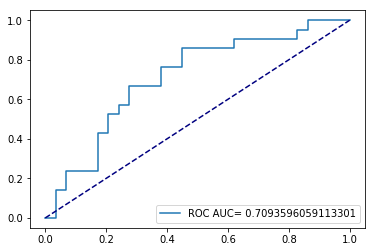

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

## Using Previous Predictions

In [129]:
prediction_df =  merged_df.copy()
prediction_df["change1"] = merged_df["Absolute_change"].shift(-1)
prediction_df["change2"] = merged_df["Absolute_change"].shift(-2)
prediction_df["change3"] = merged_df["Absolute_change"].shift(-3)
prediction_df["change4"] = merged_df["Absolute_change"].shift(-4)
prediction_df.dropna(inplace = True)
prediction_df.head(10)

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Value,Absolute_change,Percentage_change,Target,y,Unadjusted,change1,change2,change3,change4
1,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,17.50,0.10,0.0057,1,0.0,13.923602,-0.10,0.10,0.80,-0.08
2,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,17.40,-0.10,-0.0057,0,1.0,13.755736,0.10,0.80,-0.08,-0.70
3,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,17.50,0.10,0.0057,1,0.0,13.737458,0.80,-0.08,-0.70,0.57
4,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,17.40,0.80,0.0482,1,1.0,13.817057,-0.08,-0.70,0.57,-0.26
5,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,16.60,-0.08,-0.0048,0,1.0,13.838397,-0.70,0.57,-0.26,-0.33
6,19221,21982,4296.0,22955,4.0,170970.0,138602,51752,272,8089.0,...,16.68,-0.70,-0.0403,0,0.0,13.769463,0.57,-0.26,-0.33,0.44
7,19471,29407,4146.0,28999,6.0,202264.0,146563,64052,301,9335.0,...,17.38,0.57,0.0339,1,0.0,13.807604,-0.26,-0.33,0.44,-0.11
8,19315,30888,4226.0,30077,6.0,214294.0,153069,66056,299,9469.0,...,16.81,-0.26,-0.0152,0,1.0,13.897601,-0.33,0.44,-0.11,-0.69
9,19104,27213,3731.0,30022,4.0,184149.0,125701,56063,198,8467.0,...,17.07,-0.33,-0.0190,0,0.0,13.727480,0.44,-0.11,-0.69,0.36
10,20090,35842,4531.0,31374,17.0,216063.0,142392,61540,337,14232.0,...,17.40,0.44,0.0259,1,0.0,13.928655,-0.11,-0.69,0.36,-0.58


In [256]:

split_val = 50
X_train =prediction_df.drop(["y"],axis=1)[split_val:]
y_train = prediction_df.y[split_val:]

X_test = prediction_df.drop(["y"],axis=1)[:split_val]
y_test = prediction_df.y[:split_val]

GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]

y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.66

## Using Random Forest 

In [140]:
clf = RandomForestClassifier(criterion = 'gini', n_estimators=300, random_state=20)
clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)[:,1]

y_pred = clf.predict(X_test)

# Returns the mean accuracy
clf.score(X_test,y_test)

0.6

## Using Unadjusted data to predict 

In [75]:
merged_df["Unadjusted"] =  merged_df.apply(lambda row: np.log(row.Audi + row.BMW + row.Mini + row["Mercedes Benz"] + row["Mitsubishi Fuso"] + row.FCA + row["Honda Group"] + row.Hyundai + row.Isuzu + row["Jaguar Land Rover"] + row.Kia + row.Mazda + row.Mitsubishi + row.Nissan + row.Porsche + row.Subaru + row.Tesla + row["Toyota Group"] + row.Volkswagen + row.Volvo)  , axis = 1 )
    
merged_df.head()
    

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Volkswagen,Volvo,Year,Month,Value,Absolute_change,Percentage_change,Target,y,Unadjusted
1,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,32047,8826,2018,12,17.5,0.10,0.0057,1,0.0,13.923602
2,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,26789,8181,2018,11,17.4,-0.10,-0.0057,0,1.0,13.755736
3,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,29000,7327,2018,10,17.5,0.10,0.0057,1,0.0,13.737458
4,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,30555,8715,2018,9,17.4,0.80,0.0482,1,1.0,13.817057
5,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,32255,8970,2018,8,16.6,-0.08,-0.0048,0,1.0,13.838397


In [76]:
new_merged = merged_df.iloc[4:,20:]
new_merged.dropna(inplace=True)
new_merged.head()

,Year,Month,Value,Absolute_change,Percentage_change,Target,y,Unadjusted
5,2018,8,16.60,-0.08,-0.0048,0,1.0,13.838397
6,2018,7,16.68,-0.70,-0.0403,0,0.0,13.769463
7,2018,6,17.38,0.57,0.0339,1,0.0,13.807604
8,2018,5,16.81,-0.26,-0.0152,0,1.0,13.897601
9,2018,4,17.07,-0.33,-0.0190,0,0.0,13.727480


In [119]:

split_val = 50
X_train = new_merged.drop(["y"],axis=1)[split_val:]
y_train = new_merged.y[split_val:]

X_test = new_merged.drop(["y"],axis=1)[:split_val]
y_test = merged_df.y[:split_val]


from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.52

## Using additional Data

In [114]:
index_df = pd.read_excel("../data/economic_index.xlsx", sheet_name="MoM")
index_df.head()

,date,CPI US URBAN CONSUMERS MoM SA,PPI US FINISHED GOODS SA MoM%,PMI ISM MANUFACTURING SA,M1 INDEX,M2 INDEX
0,2019-02-28,0.2,0.2,54.2,3760.4,14478.8
1,2019-01-31,0.0,-0.7,56.6,3737.4,14465.9
2,2018-12-31,0.0,-0.1,54.3,3744.1,14387.7
3,2018-11-30,0.0,-1.0,58.8,3695.3,14276.5
4,2018-10-31,0.3,0.8,57.5,3718.8,14250.9


In [115]:
index_df["Timestamp"] = pd.to_datetime(index_df['date'])
index_df["Year"] = index_df['Timestamp'].dt.year
index_df["Month"] = index_df['Timestamp'].dt.month

In [82]:
merged_index = pd.merge(merged_df,index_df,on=["Year","Month"],how="inner")

cols_to_be_dropped = ["date","Timestamp"]
merged_index.drop(cols_to_be_dropped,axis=1,inplace=True)
merged_index.dropna(inplace=True)
merged_index.head()

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Absolute_change,Percentage_change,Target,y,Unadjusted,CPI US URBAN CONSUMERS MoM SA,PPI US FINISHED GOODS SA MoM%,PMI ISM MANUFACTURING SA,M1 INDEX,M2 INDEX
0,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,0.10,0.0057,1,0.0,13.923602,0.0,-0.1,54.3,3744.1,14387.7
1,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,-0.10,-0.0057,0,1.0,13.755736,0.0,-1.0,58.8,3695.3,14276.5
2,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,0.10,0.0057,1,0.0,13.737458,0.3,0.8,57.5,3718.8,14250.9
3,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,0.80,0.0482,1,1.0,13.817057,0.1,-0.1,59.5,3703.5,14224.9
4,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,-0.08,-0.0048,0,1.0,13.838397,0.1,0.0,60.8,3679.8,14190.4


In [112]:

split_val = 50
X_train = merged_index.drop(["y"],axis=1)[split_val:]
y_train = merged_index.y[split_val:]

X_test = merged_index.drop(["y"],axis=1)[:split_val]
y_test = merged_index.y[:split_val]


from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.48

## Adding PCA to find out the important features

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_index = merged_index.drop(["y"], axis = 1)
principalComponents = pca.fit_transform(pca_index)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

principalDf.head()

,pc1,pc2,pc3,pc4,pc5
0,-37343.246525,-12923.836602,-948.705492,22854.616766,2669.060866
1,21761.231149,6235.900643,-6509.954308,12556.333751,-4640.754406
2,23991.988185,6050.096715,-1310.029038,13046.346124,-4858.318265
3,-4748.038546,5327.178496,-13587.136740,12924.688748,-3393.651682
4,-19527.738266,19452.829072,6744.516643,10860.128411,-3368.117993


## Applying Gradient Boosting  after selecting important features

In [102]:
split_val = 50
X_train1 = principalDf[split_val:]
y_train1 = merged_index.y[split_val:]

X_test1 = principalDf[:split_val]
y_test1 = merged_index.y[:split_val]

GBC = GradientBoostingClassifier()

GBC.fit(X_train1,y_train1)
y_pred_proba = GBC.predict_proba(X_test1)[:,1]
y_pred = GBC.predict(X_test1)

# Returns the mean accuracy
GBC.score(X_test1,y_test1)

0.54

In [144]:
clf =  SVC(probability=True,C = 10, gamma = 0.1 )
clf.fit(X_train1,y_train1)
y_pred_proba = clf.predict_proba(X_test1)[:,1]

y_pred = clf.predict(X_test1)

# Returns the mean accuracy
clf.score(X_test1,y_test1)

0.42

## Adding more data

In [158]:
nom_gdp = pd.read_excel("../data/econ_factor.xlsx", sheet_name="nominal GDP", skiprows=[1,2,3])
nom_gdp.head()

,Date,MAMGNOM
0,2019-01-31,10.0
1,2018-12-31,5.2
2,2018-11-30,-1.7
3,2018-10-31,8.9
4,2018-09-30,3.8


In [181]:
real_gdp = pd.read_excel("../data/econ_factor.xlsx", sheet_name="real GDP", skiprows=[1,2,3], usecols=[1])
prod_df = pd.read_excel("../data/econ_factor.xlsx", sheet_name="us auto production", skiprows=[1,2,3], usecols=[1])
consumer_df = pd.read_excel("../data/econ_factor.xlsx", sheet_name="auto consumer SA", skiprows=[1,2,3], usecols=[1])
parts_df = pd.read_excel("../data/econ_factor.xlsx", sheet_name="auto parts", skiprows=[1,2,3], usecols=[1])
price_df = pd.read_excel("../data/econ_factor.xlsx", sheet_name="national average gasoline price", skiprows=[1,2,3], usecols=[1])




In [182]:
econ_df = pd.concat([nom_gdp, real_gdp, prod_df, consumer_df, parts_df, price_df], axis = 1)

econ_df["Timestamp"] = pd.to_datetime(econ_df['Date'])
econ_df["Year"] = econ_df['Timestamp'].dt.year
econ_df["Month"] = econ_df['Timestamp'].dt.month
econ_df.head()

,Date,MAMGNOM,MAMGREAL,CAR PROD,INPRATCS,INPRAPAS,Mid Price,Timestamp,Year,Month
0,2019-01-31,10.0,9.0,238.1,-9.3,-1.6,2.262,2019-01-31,2019,1
1,2018-12-31,5.2,5.0,254.4,6.3,-1.6,2.257,2018-12-31,2018,12
2,2018-11-30,-1.7,-2.3,237.2,1.4,-0.3,2.477,2018-11-30,2018,11
3,2018-10-31,8.9,5.2,235.6,-3.4,0.3,2.793,2018-10-31,2018,10
4,2018-09-30,3.8,2.1,230.2,3.2,-1.1,2.877,2018-09-30,2018,9


In [183]:
merged_econ = pd.merge(merged_df,econ_df,on=["Year","Month"],how="inner")

cols_to_be_dropped = ["Date","Timestamp"]
merged_econ.drop(cols_to_be_dropped,axis=1,inplace=True)
merged_econ.dropna(inplace=True)
merged_econ.head()

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Percentage_change,Target,y,Unadjusted,MAMGNOM,MAMGREAL,CAR PROD,INPRATCS,INPRAPAS,Mid Price
0,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,0.0057,1,0.0,13.923602,5.2,5.0,254.4,6.3,-1.6,2.257
1,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,-0.0057,0,1.0,13.755736,-1.7,-2.3,237.2,1.4,-0.3,2.477
2,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,0.0057,1,0.0,13.737458,8.9,5.2,235.6,-3.4,0.3,2.793
3,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,0.0482,1,1.0,13.817057,3.8,2.1,230.2,3.2,-1.1,2.877
4,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,-0.0048,0,1.0,13.838397,1.3,-0.3,213.0,4.9,0.8,2.837


In [184]:

split_val = 50
X_train = merged_econ.drop(["y"],axis=1)[split_val:]
y_train = merged_econ.y[split_val:]

X_test = merged_econ.drop(["y"],axis=1)[:split_val]
y_test = merged_econ.y[:split_val]



GBC = GradientBoostingClassifier()

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.62

##  Model wih Previous prediction and this data

In [185]:
prediction_econ =  merged_econ.copy()
prediction_econ["change1"] = merged_econ["Absolute_change"].shift(-1)


prediction_econ.dropna(inplace = True)
prediction_econ.head(10)

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Target,y,Unadjusted,MAMGNOM,MAMGREAL,CAR PROD,INPRATCS,INPRAPAS,Mid Price,change1
0,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,1,0.0,13.923602,5.2,5.0,254.4,6.3,-1.6,2.257,-0.10
1,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,0,1.0,13.755736,-1.7,-2.3,237.2,1.4,-0.3,2.477,0.10
2,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,1,0.0,13.737458,8.9,5.2,235.6,-3.4,0.3,2.793,0.80
3,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,1,1.0,13.817057,3.8,2.1,230.2,3.2,-1.1,2.877,-0.08
4,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,0,1.0,13.838397,1.3,-0.3,213.0,4.9,0.8,2.837,-0.70
5,19221,21982,4296.0,22955,4.0,170970.0,138602,51752,272,8089.0,...,0,0.0,13.769463,7.4,7.3,209.2,-3.6,1.4,2.869,0.57
6,19471,29407,4146.0,28999,6.0,202264.0,146563,64052,301,9335.0,...,1,0.0,13.807604,2.5,0.0,220.6,9.9,-0.2,2.854,-0.26
7,19315,30888,4226.0,30077,6.0,214294.0,153069,66056,299,9469.0,...,0,1.0,13.897601,11.2,7.3,226.7,-10.3,-0.4,2.957,-0.33
8,19104,27213,3731.0,30022,4.0,184149.0,125701,56063,198,8467.0,...,0,0.0,13.727480,12.3,6.9,242.8,-2.0,-0.2,2.811,0.44
9,20090,35842,4531.0,31374,17.0,216063.0,142392,61540,337,14232.0,...,1,0.0,13.928655,1.7,0.1,248.4,2.4,-0.3,2.657,-0.11


In [236]:

split_val = 50
X_train = prediction_econ.drop(["y"],axis=1)[split_val:]
y_train = prediction_econ.y[split_val:]

X_test = prediction_econ.drop(["y"],axis=1)[:split_val]
y_test = prediction_econ.y[:split_val]

GBC = GradientBoostingClassifier(learning_rate = 0.1, n_estimators= 550 )

GBC.fit(X_train,y_train)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
y_pred = GBC.predict(X_test)

# Returns the mean accuracy
GBC.score(X_test,y_test)

0.7

The above merging of dataframe did not help, however let's try to tune the parameters for gardient boosing if it increases the performances


In [244]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,350, 400, 450, 500,750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(), 
            param_grid = p_test3, scoring='accuracy', cv=5)
tuning.fit(X_train,y_train)

/Users/akanksha_rajput/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 'n_estimators': [100, 250, 350, 400, 450, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [245]:
tuning.best_params_

{'learning_rate': 0.15, 'n_estimators': 500}

In [246]:
tuning.best_score_

0.5664739884393064